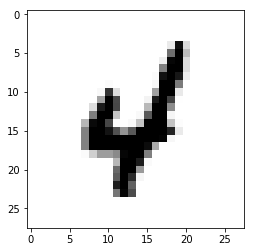

percentage_accuracy is equal to 84
final result


,Label
ImageId,
1,2
2,0
3,9
4,9
5,6
6,9
7,0
8,3
9,0


In [129]:
#################################################BASIC PROJECT DISCUSSION######################################################
# In this Project we are provided with two datasets "train.csv" and "test.csv". The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. 
#The rest of the columns contain the pixel-values of the associated image. In test dataset no label column is given and in final 
#submission we have to predict labels from given data and providing the percentage accuracy of model. 


# IMPORTING LIBRARIES NUMPY, PANDAS, MATPLOTLIB(GENERATE FIGURE), SKLEARN(FOR PERFORMING OPERATIONS USING MODEL)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MODEL USED IS DECISSION CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

#IMPORTING THE DATASET USING PANDAS
data = pd.read_csv("train.csv")
#data.head()
#data.shape
clf = DecisionTreeClassifier()

# DIVIDING THE DATA FOR TRAING AND TESTING
# 70 PERCENT OF THE DATA IS TRAINED 
x_train = data.iloc[0:29400,1:]
train_lbl = data.iloc[0:29400,0]

#FITTING DATA INTO THE CLASSIFIER FOR TRAINING
clf.fit(x_train, train_lbl)

#TESTING THE DATA ON THE REST 30 PERCENT DATA
x_test = data.iloc[29400:,1:]
actual_lbl = data.iloc[29400:,0]
#actual_lbl = actual_lbl.reset_index(drop=True, inplace=True)


# CONVERTING LIST OF DATA INTO AN ARRAY
actual_lbl = np.array(actual_lbl)
#print(actual_lbl)
d = x_test.iloc[8]


pred = clf.predict(x_test)

#print(pred)
#d.shape(28,28)
#pt.imshow(d, cmap = "gray")
#plt.show()
#CONVERT ROW VECTOR INTO LIST THEN INTO MATRIX
sm = np.matrix(d.tolist())
sm = sm.reshape(28,28)

#255- IS USED TO PRINT BLACK LETTER WITH WHITE BACKGROUND
plt.imshow(255-sm, cmap = "gray")

plt.show()



# COMPARISION OF ACTUAL LABELS WITH PREDICTED LABELS
z = 0
for i in range(0,42000-29400):
    if (pred[i] == actual_lbl[i]):
        z = z+1
acc = (z/(42000 - 29400)*100)
# PERCENTAGE ACCURACY
print("percentage_accuracy is equal to %d"%acc)


##############WORKING ON TEST DATA######################


# IMPORTING THE TEST DATA
test_data = pd.read_csv("test.csv")

#test_data.head()
x_testdata = test_data.iloc[:,:]

# PREDICTING THE LABELS OF TEST DATA USING CLASSIFIER
test_predict = clf.predict(x_testdata)
#print(test_predict)

# CONVERTING PREDICTED DATA INTO DATAFRAME
Frame = pd.DataFrame(test_predict)
Frame.index.name = "ImageId"

#Frame.insert(0, "ImageId", np.arange(1,28001), True)
Frame = Frame.rename(columns={0: 'Label'})

#INCREMENT INDEX BY ONE
Frame.index += 1
#Frame.set_index('ImageId',inplace=True)
#Frame = Frame.reset_index(drop=True, inplace=True)

#df2 = pd.Series(test_predict)
#Frame=pd.DataFrame(test_predict, columns = ["ImageId","Label"])

# FINAL RESULT
print("final result")
Frame

